<a href="https://colab.research.google.com/github/Ayvak16122005/Correlation_Regression/blob/main/ML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Program to Create a scatter plot between cylinder vs Co2Emission (green color)
#Developed by:Kavya T
#RegisterNumber:2305003004

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize']=(7.0,7.0)
df=pd.read_csv("/content/ML FuelConsumption (3).csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


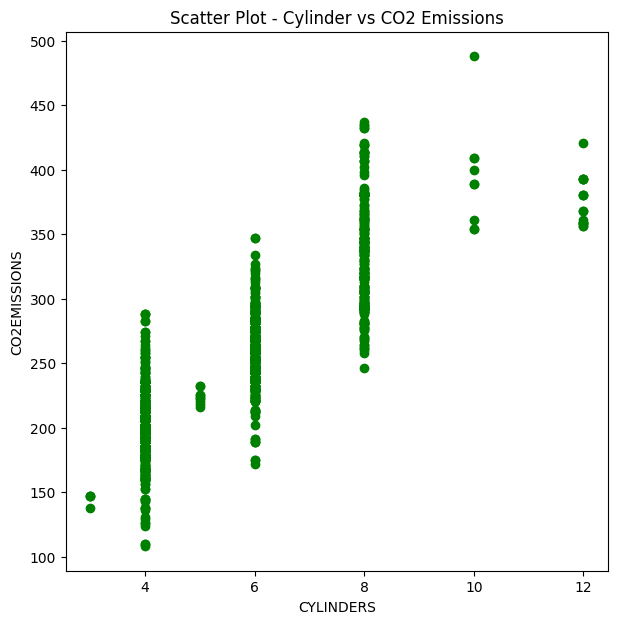

In [ ]:
plt.title('Scatter Plot - Cylinder vs CO2 Emissions')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], color='green')
plt.show()

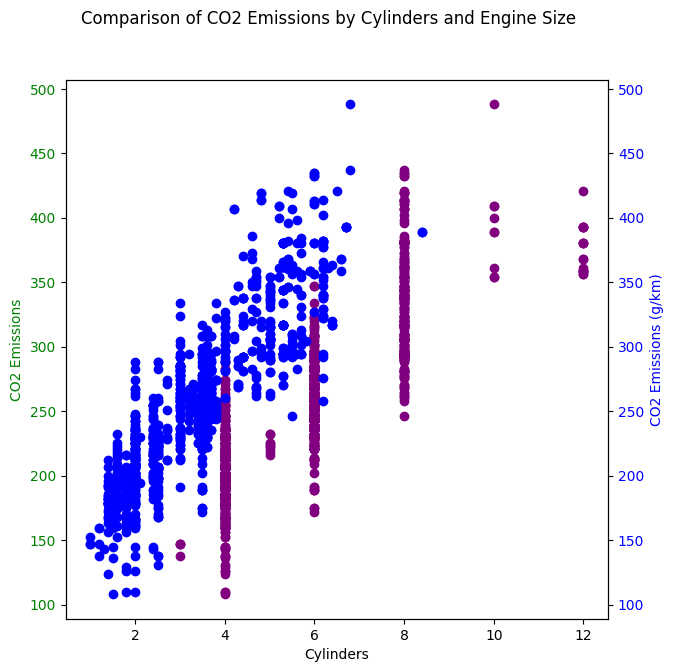

In [ ]:
#Q2. Using scatter plot compare data   cylinder vs Co2Emission and Enginesize Vs Co2Emission using different colors
# Create two scatter plots in one figure: one for Cylinder vs CO2 Emissions and another for Engine Size vs CO2 Emissions
fig, ax1 = plt.subplots()
# Plot Cylinder vs CO2 Emissions in purple
ax1.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], color='purple')
ax1.set_xlabel('Cylinders')
ax1.set_ylabel('CO2 Emissions', color='green')
ax1.tick_params(axis='y', labelcolor='green')
# Create a second y-axis for the Engine Size vs CO2 Emissions plot
ax2 = ax1.twinx()
ax2.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color='blue')
ax2.set_ylabel('CO2 Emissions (g/km)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add a title to the figure
fig.suptitle('Comparison of CO2 Emissions by Cylinders and Engine Size')

# Show the plot
plt.show()

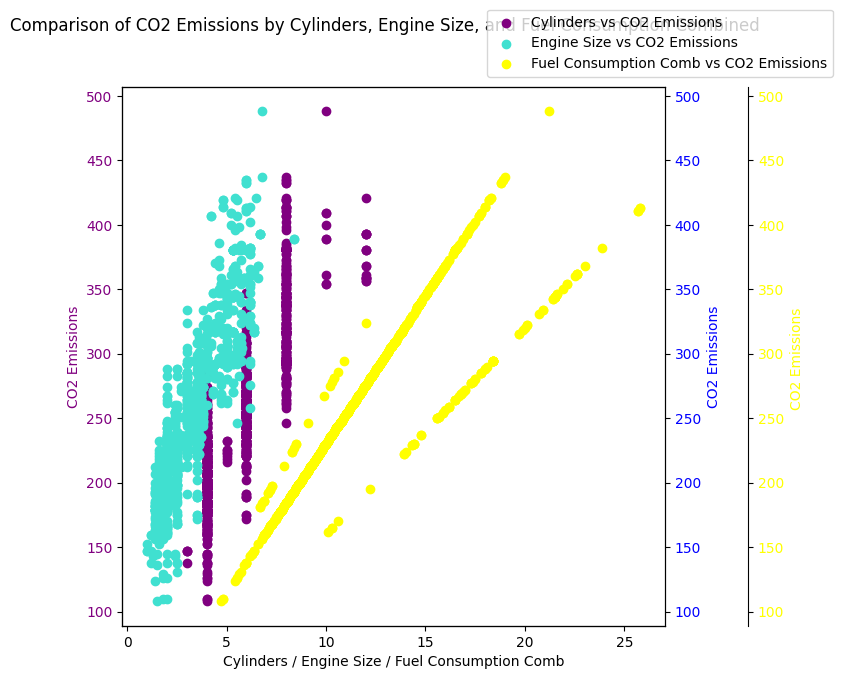

In [ ]:
#Q3. Using scatter plot compare data   cylinder vs Co2Emission and Enginesize Vs Co2Emission and
#FuelConsumption_comb Co2Emission using different colors
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot Cylinder vs CO2 Emissions in purple
ax1.scatter(df['CYLINDERS'], df['CO2EMISSIONS'], color='purple', label='Cylinders vs CO2 Emissions')
ax1.set_xlabel('Cylinders / Engine Size / Fuel Consumption Comb')
ax1.set_ylabel('CO2 Emissions', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Create a second y-axis for the Engine Size vs CO2 Emissions plot
ax2 = ax1.twinx()
ax2.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color='turquoise', label='Engine Size vs CO2 Emissions')
ax2.set_ylabel('CO2 Emissions', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Create a third scatter plot for Fuel Consumption Combined vs CO2 Emissions
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right
ax3.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], color='yellow', label='Fuel Consumption Comb vs CO2 Emissions')
ax3.set_ylabel('CO2 Emissions ', color='yellow')
ax3.tick_params(axis='y', labelcolor='yellow')

# Add a title to the figure
fig.suptitle('Comparison of CO2 Emissions by Cylinders, Engine Size, and Fuel Consumption Combined')

# Show the plot with a legend
fig.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.show()

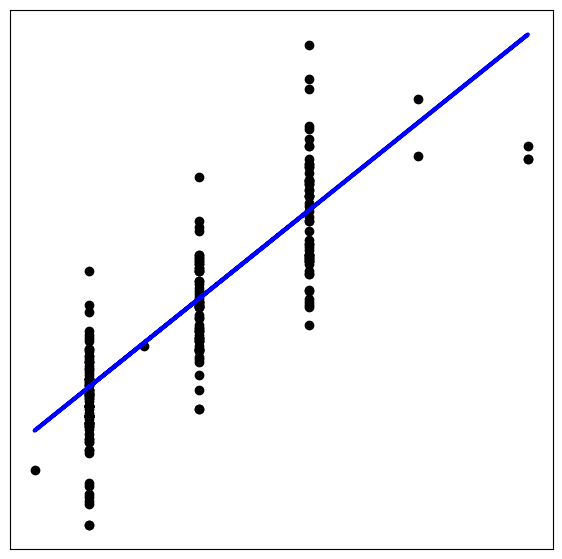

Coefficients: [30.01473943]
Intercept: 84.00737444965029
Mean squared error: 1292.27
Coefficient of determination: 0.69


In [ ]:
#Q4. Train your model with independent variable as cylinder and dependent variable as Co2Emission

# Select the 'CYLINDERS' column as the independent variable (feature)
X = df[['CYLINDERS']]
# Select the 'CO2EMISSIONS' column as the dependent variable (target)
y = df['CO2EMISSIONS']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create a linear regression model
model = LinearRegression()
# Train the model using the training sets
model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(X_test)
# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
# Print model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
# The mean squared error
print('Mean squared error: %.2f' % np.mean((y_pred - y_test) ** 2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % model.score(X_test, y_test))

Coefficients: [15.93412876]
Mean squared error: 746.32
Coefficient of determination: 0.82


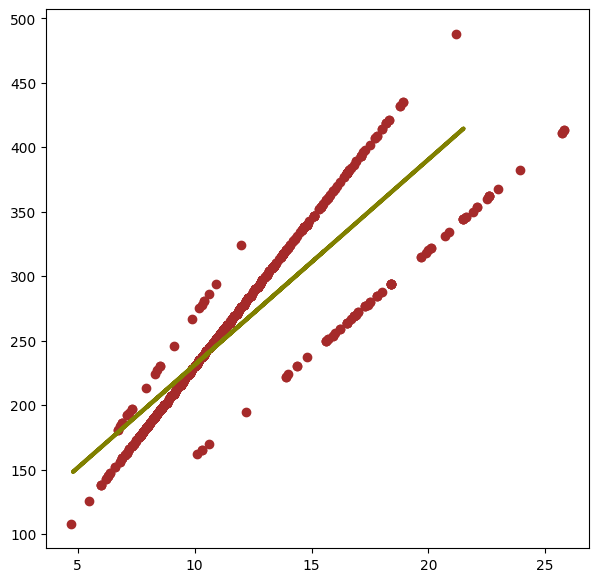

In [ ]:
#Q5. Train another model with independent variable as FuelConsumption_comb and dependent variable as Co2Emission
# Select the 'FUELCONSUMPTION_COMB' column as the independent variable (feature)
X = df[['FUELCONSUMPTION_COMB']]
# Select the 'CO2EMISSIONS' column as the dependent variable (target)
y = df['CO2EMISSIONS']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create a linear regression model
model = LinearRegression()
# Train the model using the training sets
model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The coefficients
print('Coefficients:', model.coef_)
# The mean squared error
print('Mean squared error: %.2f' % np.mean((y_pred - y_test) ** 2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % model.score(X_test, y_test))
# Plot outputs
plt.scatter(X_train, y_train, color='Brown')
plt.plot(X_test, y_pred, color='Olive', linewidth=3)
plt.show()

In [ ]:
#Q6. Train your model on different train test ratio and train the models and note down their accuracies
X = df[['CYLINDERS']]
# Select the 'CO2EMISSIONS' column as the dependent variable (target)
y = df['CO2EMISSIONS']
# Different train-test ratios
train_test_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
# Dictionary to store the accuracies for each ratio
accuracies = {}
# Train and test the model for each ratio
for ratio in train_test_ratios:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)# Train and test the model for each ratio
  model = LinearRegression()# Split the data into training and testing sets
  model.fit(X_train, y_train)# Create a linear regression model
  y_pred = model.predict(X_test)# Train the model using the training sets
  accuracy = r2_score(y_test, y_pred)# Make predictions using the testing set
  accuracies[ratio] = accuracy# Store the accuracy in the dictionary
# Print the accuracies for each train-test ratio
for ratio, accuracy in accuracies.items():
  print(f"Train-test ratio: {ratio}, Accuracy: {accuracy:.2f}")

Train-test ratio: 0.1, Accuracy: 0.73
Train-test ratio: 0.2, Accuracy: 0.73
Train-test ratio: 0.3, Accuracy: 0.74
Train-test ratio: 0.4, Accuracy: 0.72
Train-test ratio: 0.5, Accuracy: 0.73
